In [1]:
import numpy as np
import jax.numpy as jnp
import jax
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import rho_plus as rp

is_dark = False
theme, cs = rp.mpl_setup(is_dark)
rp.plotly_setup(is_dark)

In [2]:
%cd ~/programs/avid

/home/nicholas/programs/avid


In [18]:
from pathlib import Path
import pyrallis
from avid.config import MainConfig
import orbax.checkpoint as ocp

from avid.training_state import TrainingRun
from avid.checkpointing import best_ckpt

# run_dir = Path('logs') / '03-17:45_918'
# run_dir = Path('logs') / 'e_form_no_downsample_564'
# run_dir = Path('logs') / 'e_form_equivariant_patch_235'
# run_dir = Path('logs') / '04-13-interrupted-919'
# run_dir = Path('logs') / '04-13-14_650'
run_dir = Path('logs') / '04-15-04_881'

with open(run_dir / 'config.toml') as conf_file:
    config = pyrallis.cfgparsing.load(MainConfig, conf_file)

model = config.build_diled()

ckpt = best_ckpt(run_dir)
# ckpt = jax.tree.map(lambda x: x if isinstance(x, (float, int)) else x.astype(jnp.bfloat16), ckpt)
model = model.bind(ckpt['state']['params'])

Configured `CheckpointManager` using deprecated legacy API. Please follow the instructions at                      
https://orbax.readthedocs.io/en/latest/api_refactor.html to migrate by May 1st, 2024.

Given directory is read only=/home/nicholas/programs/avid/logs/04-15-04_881/final_ckpt/ckpts

Restoring item from /home/nicholas/programs/avid/logs/04-15-04_881/final_ckpt/ckpts/41599.

Finished restoring checkpoint from /home/nicholas/programs/avid/logs/04-15-04_881/final_ckpt/ckpts/41599.

In [19]:
from avid.utils import debug_structure, debug_stat
params = ckpt['state']['params']['params']
debug_structure(params);
debug_stat(params);

arg0
├── diffusion >>> backbone
│   ├── aby_scale
│   │   └── float32[6]
│   ├── condition_mlp
│   │   ├── Dense_0
│   │   │   ├── bias
│   │   │   │   └── float32[256]
│   │   │   └── kernel
│   │   │       └── float32[256, 256]
│   │   ├── Dense_1
│   │   │   ├── bias
│   │   │   │   └── float32[2304]
│   │   │   └── kernel
│   │   │       └── float32[256, 2304]
│   │   └── LayerNorm_0
│   │       ├── bias
│   │       │   └── float32[256]
│   │       └── scale
│   │           └── float32[256]
│   ├── encoder
│   │   ├── encoder_norm
│   │   │   ├── bias
│   │   │   │   └── float32[384]
│   │   │   └── scale
│   │   │       └── float32[384]
│   │   ├── encoderblock_0
│   │   │   ├── EquivariantMHA_0
│   │   │   │   ├── key
│   │   │   │   │   └── {...}
│   │   │   │   ├── key_ln
│   │   │   │   │   └── {...}
│   │   │   │   ├── out
│   │   │   │   │   └── {...}
│   │   │   │   ├── query
│   │   │   │   │   └── {...}
│   │   │   │   ├── query_ln
│   │   │   │   │   └── {...}
│   │   │   │   ├── relative_attn
│   │   │   │   │   └── bfloat16[35, 6]
│   │   │   │   └── value
│   │   │   │       └── {...}
│   │   │   ├── LayerNorm_0
│   │   │   │   ├── bias
│   │   │   │   │   └── float32[384]
│   │   │   │   └── scale
│   │   │   │       └── float32[384]
│   │   │   ├── LayerNorm_1
│   │   │   │   ├── bias
│   │   │   │   │   └── float32[384]
│   │   │   │   └── scale
│   │   │   │       └── float32[384]
│   │   │   └── LazyInMLP_0 >>> Dense_0
│   │   │       ├── bias
│   │   │       │   └── float32[384]
│   │   │       └── kernel
│   │   │           └── float32[384, 384]
│   │   ├── encoderblock_1
│   │   │   ├── EquivariantMHA_0
│   │   │   │   ├── key
│   │   │   │   │   └── {...}
│   │   │   │   ├── key_ln
│   │   │   │   │   └── {...}
│   │   │   │   ├── out
│   │   │   │   │   └── {...}
│   │   │   │   ├── query
│   │   │   │   │   └── {...}
│   │   │   │   ├── query_ln
│   │   │   │   │   └── {...}
│   │   │   │   ├── relative_attn
│   │   │   │   │   └── bfloat16[35, 6]
│   │   │   │   └── value
│   │   │   │       └── {...}
│   │   │   ├── LayerNorm_0
│   │   │   │   ├── bias
│   │   │   │   │   └── float32[384]
│   │   │   │   └── scale
│   │   │   │       └── float32[384]
│   │   │   ├── LayerNorm_1
│   │   │   │   ├── bias
│   │   │   │   │   └── float32[384]
│   │   │   │   └── scale
│   │   │   │       └── float32[384]
│   │   │   └── LazyInMLP_0 >>> Dense_0
│   │   │       ├── bias
│   │   │       │   └── float32[384]
│   │   │       └── kernel
│   │   │           └── float32[384, 384]
│   │   ├── encoderblock_2
│   │   │   ├── EquivariantMHA_0
│   │   │   │   ├── key
│   │   │   │   │   └── {...}
│   │   │   │   ├── key_ln
│   │   │   │   │   └── {...}
│   │   │   │   ├── out
│   │   │   │   │   └── {...}
│   │   │   │   ├── query
│   │   │   │   │   └── {...}
│   │   │   │   ├── query_ln
│   │   │   │   │   └── {...}
│   │   │   │   ├── relative_attn
│   │   │   │   │   └── bfloat16[35, 6]
│   │   │   │   └── value
│   │   │   │       └── {...}
│   │   │   ├── LayerNorm_0
│   │   │   │   ├── bias
│   │   │   │   │   └── float32[384]
│   │   │   │   └── scale
│   │   │   │       └── float32[384]
│   │   │   ├── LayerNorm_1
│   │   │   │   ├── bias
│   │   │   │   │   └── float32[384]
│   │   │   │   └── scale
│   │   │   │       └── float32[384]
│   │   │   └── LazyInMLP_0 >>> Dense_0
│   │   │       ├── bias
│   │   │       │   └── float32[384]
│   │   │       └── kernel
│   │   │           └── float32[384, 384]
│   │   └── encoderblock_3
│   │       ├── EquivariantMHA_0
│   │       │   ├── key
│   │       │   │   └── {...}
│   │       │   ├── key_ln
│   │       │   │   └── {...}
│   │       │   ├── out
│   │       │   │   └── {...}
│   │       │   ├── query
│   │       │   │   └── {...}
│   │       │   ├── query_ln
│   │       │   │   └── {...}
│   │       │   ├── relative_attn
│   │       │   │   └── bfloat16[35, 6]
│   │       │   └── value
│   │       │       └── {...}
│   │       ├── LayerNorm_0
│   │      

arg0
├── diffusion >>> backbone
│   ├── aby_scale
│   │   └── -0.0004
│   ├── condition_mlp
│   │   ├── Dense_0
│   │   │   ├── bias
│   │   │   │   └── -0.0081
│   │   │   └── kernel
│   │   │       └── -0.0003
│   │   ├── Dense_1
│   │   │   ├── bias
│   │   │   │   └── 0.0004
│   │   │   └── kernel
│   │   │       └── 0.0001
│   │   └── LayerNorm_0
│   │       ├── bias
│   │       │   └── 0.0035
│   │       └── scale
│   │           └── 0.0414
│   ├── encoder
│   │   ├── encoder_norm
│   │   │   ├── bias
│   │   │   │   └── 0.0000
│   │   │   └── scale
│   │   │       └── 1.0062
│   │   ├── encoderblock_0
│   │   │   ├── EquivariantMHA_0
│   │   │   │   ├── key
│   │   │   │   │   └── {...}
│   │   │   │   ├── key_ln
│   │   │   │   │   └── {...}
│   │   │   │   ├── out
│   │   │   │   │   └── {...}
│   │   │   │   ├── query
│   │   │   │   │   └── {...}
│   │   │   │   ├── query_ln
│   │   │   │   │   └── {...}
│   │   │   │   ├── relative_attn
│   │   │   │   │   └── -0.0153
│   │   │   │   └── value
│   │   │   │       └── {...}
│   │   │   ├── LayerNorm_0
│   │   │   │   ├── bias
│   │   │   │   │   └── 0.0004
│   │   │   │   └── scale
│   │   │   │       └── 0.0033
│   │   │   ├── LayerNorm_1
│   │   │   │   ├── bias
│   │   │   │   │   └── 0.0017
│   │   │   │   └── scale
│   │   │   │       └── -0.0008
│   │   │   └── LazyInMLP_0 >>> Dense_0
│   │   │       ├── bias
│   │   │       │   └── 0.0002
│   │   │       └── kernel
│   │   │           └── -0.0001
│   │   ├── encoderblock_1
│   │   │   ├── EquivariantMHA_0
│   │   │   │   ├── key
│   │   │   │   │   └── {...}
│   │   │   │   ├── key_ln
│   │   │   │   │   └── {...}
│   │   │   │   ├── out
│   │   │   │   │   └── {...}
│   │   │   │   ├── query
│   │   │   │   │   └── {...}
│   │   │   │   ├── query_ln
│   │   │   │   │   └── {...}
│   │   │   │   ├── relative_attn
│   │   │   │   │   └── -0.0146
│   │   │   │   └── value
│   │   │   │       └── {...}
│   │   │   ├── LayerNorm_0
│   │   │   │   ├── bias
│   │   │   │   │   └── 0.0006
│   │   │   │   └── scale
│   │   │   │       └── 0.0023
│   │   │   ├── LayerNorm_1
│   │   │   │   ├── bias
│   │   │   │   │   └── 0.0008
│   │   │   │   └── scale
│   │   │   │       └── 0.0054
│   │   │   └── LazyInMLP_0 >>> Dense_0
│   │   │       ├── bias
│   │   │       │   └── 0.0003
│   │   │       └── kernel
│   │   │           └── -0.0002
│   │   ├── encoderblock_2
│   │   │   ├── EquivariantMHA_0
│   │   │   │   ├── key
│   │   │   │   │   └── {...}
│   │   │   │   ├── key_ln
│   │   │   │   │   └── {...}
│   │   │   │   ├── out
│   │   │   │   │   └── {...}
│   │   │   │   ├── query
│   │   │   │   │   └── {...}
│   │   │   │   ├── query_ln
│   │   │   │   │   └── {...}
│   │   │   │   ├── relative_attn
│   │   │   │   │   └── -0.0078
│   │   │   │   └── value
│   │   │   │       └── {...}
│   │   │   ├── LayerNorm_0
│   │   │   │   ├── bias
│   │   │   │   │   └── 0.0004
│   │   │   │   └── scale
│   │   │   │       └── 0.0024
│   │   │   ├── LayerNorm_1
│   │   │   │   ├── bias
│   │   │   │   │   └── 0.0010
│   │   │   │   └── scale
│   │   │   │       └── 0.0011
│   │   │   └── LazyInMLP_0 >>> Dense_0
│   │   │       ├── bias
│   │   │       │   └── 0.0004
│   │   │       └── kernel
│   │   │           └── -0.0000
│   │   └── encoderblock_3
│   │       ├── EquivariantMHA_0
│   │       │   ├── key
│   │       │   │   └── {...}
│   │       │   ├── key_ln
│   │       │   │   └── {...}
│   │       │   ├── out
│   │       │   │   └── {...}
│   │       │   ├── query
│   │       │   │   └── {...}
│   │       │   ├── query_ln
│   │       │   │   └── {...}
│   │       │   ├── relative_attn
│   │       │   │   └── -0.0043
│   │       │   └── value
│   │       │       └── {...}
│   │       ├── LayerNorm_0
│   │       │   ├── bias
│   │       │   │   └── 0.0002
│   │       │   └── scale
│   │       │       └── 0.0038
│   │       ├── LayerNorm_1
│   │       │   ├── bias
│   │       │   │   └── 0.0013
│   │       │   └── scale


In [20]:
model.encoder_decoder.spec_emb.species_embed_matrix()


Array([[ 5.2343082e-01, -4.6030942e-02,  1.4830156e-01, ...,
        -6.6568568e-02, -1.5345813e-02,  2.0509809e-01],
       [-1.9153832e-02,  5.8834696e-01,  1.8057104e-02, ...,
        -2.7226320e-02, -5.0591100e-02, -1.4159838e-02],
       [ 7.5765334e-02, -5.5947062e-03,  6.2535077e-01, ...,
        -3.4145989e-02, -2.1959448e-02, -1.4632693e-01],
       ...,
       [-1.8003505e-02,  1.9420050e-02,  1.0441398e-03, ...,
        -6.9752634e-02, -3.2542390e-03, -5.5959344e-02],
       [ 5.9660245e-02, -1.0773368e-01, -4.4106819e-02, ...,
         5.2821856e-02,  3.1400193e-04, -6.7035183e-02],
       [ 1.8414356e-01, -3.0874370e-02,  1.3229518e-02, ...,
        -3.2253806e-02, -1.5026073e-01, -3.5121311e-02]], dtype=float32)

,Li,Be,B,N,O,F,Na,Mg,Al,Si,...,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi
0,0.523431,-0.019154,0.075765,0.020896,-0.022506,-0.015802,-0.020266,0.010158,0.040212,0.026033,...,0.060501,-0.202444,-0.109873,0.076118,0.033115,-0.059092,0.027062,-0.018004,0.059660,0.184144
1,-0.046031,0.588347,-0.005595,0.043950,0.036175,0.022668,-0.046666,-0.055127,0.076956,-0.125998,...,-0.069053,-0.015026,-0.193331,-0.030510,-0.006483,0.022925,-0.024603,0.019420,-0.107734,-0.030874
2,0.148302,0.018057,0.625351,0.061447,-0.003812,0.031648,0.136686,0.036557,-0.094209,0.000207,...,-0.049931,0.076476,0.104345,-0.061626,0.061440,0.061374,0.157469,0.001044,-0.044107,0.013230
3,0.048292,0.029836,0.004895,0.476278,-0.257199,-0.068388,-0.105892,0.088592,0.097795,0.112866,...,0.205800,0.049499,0.046308,0.037444,-0.028099,0.040571,-0.083228,0.076315,-0.082864,-0.144763
4,0.129746,-0.019489,-0.059492,-0.146306,0.622506,-0.140499,0.063092,-0.061947,0.017862,0.046842,...,-0.007601,0.032669,0.126919,-0.114737,-0.083603,0.067676,0.018331,-0.117780,-0.087490,0.057006


<Axes: >

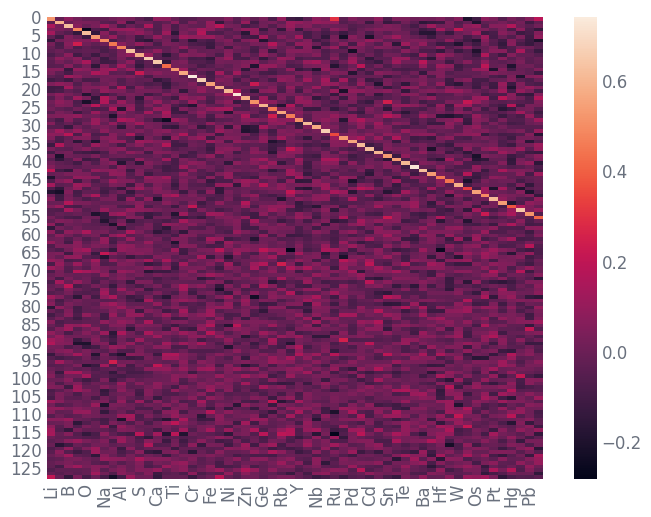

In [63]:
from avid.utils import ELEM_VALS
spec_emb = model.encoder_decoder.spec_emb.species_embed_matrix()

spec_df = pd.DataFrame(spec_emb, index=ELEM_VALS).T.reset_index(drop=True)
display(spec_df.head())

sns.heatmap(spec_df)

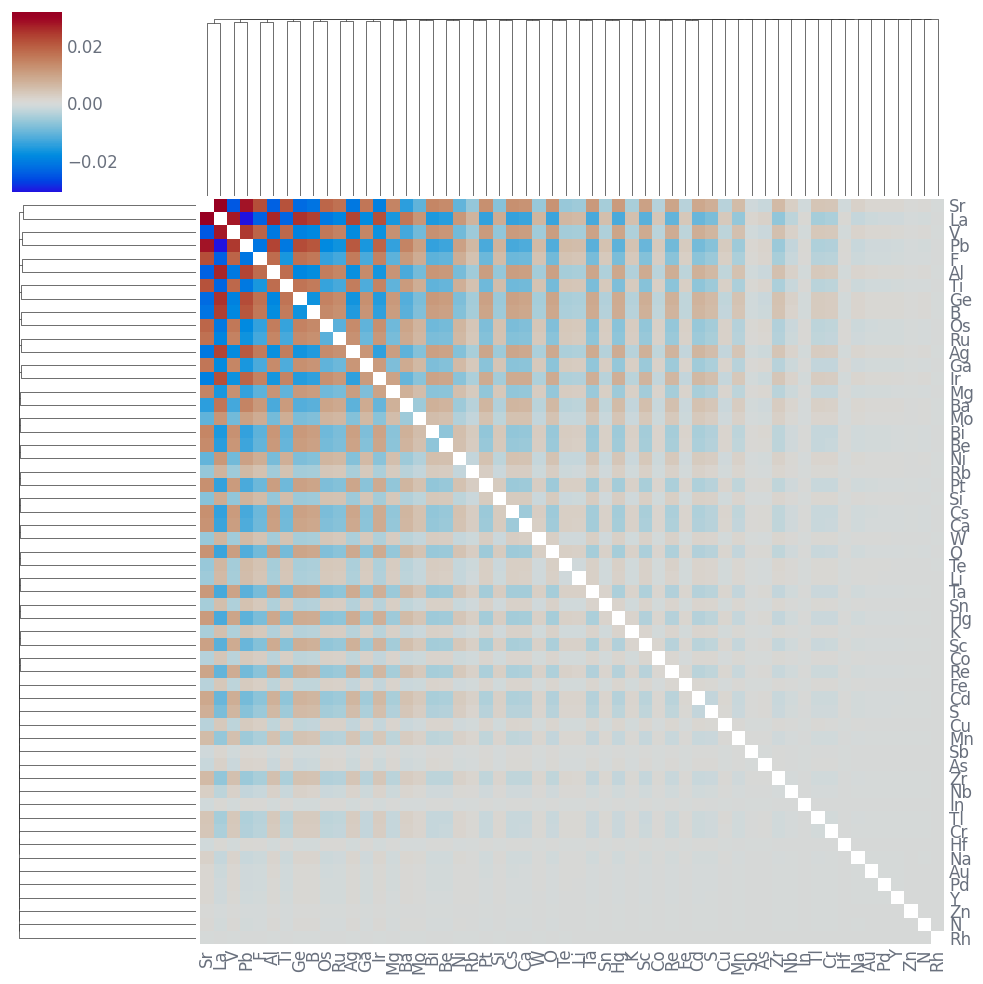

In [35]:
corr = spec_df.corr(method='pearson')
sns.clustermap(corr, xticklabels=1, yticklabels=1, cmap='rho_diverging', center=0, mask=corr == 1)

In [64]:
from avid.diled import conv_basis


econv = model.encoder_decoder.encoder_conv.layers[0].layers[0]
econv.basis[3]


Array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 1., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 1., 0., 1., 0.],
        [0., 0., 0., 0., 0.],
        [0., 1., 0., 1., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 1., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]], dtype=float32)

<Axes: >

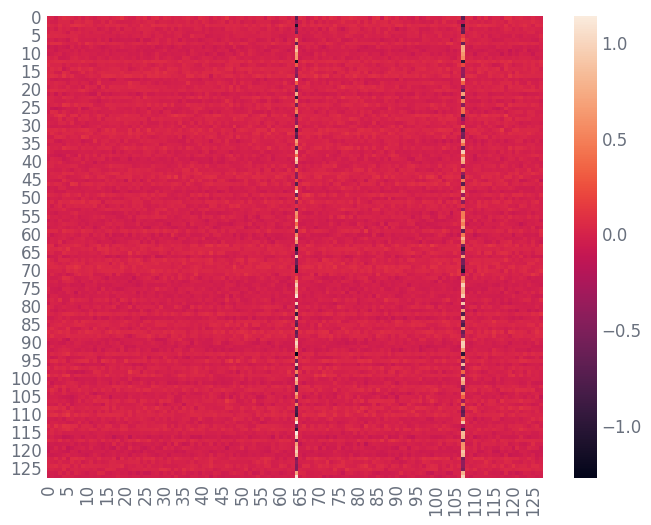

In [93]:
sns.heatmap(enc_kernel[0, 0, 0, :, :])

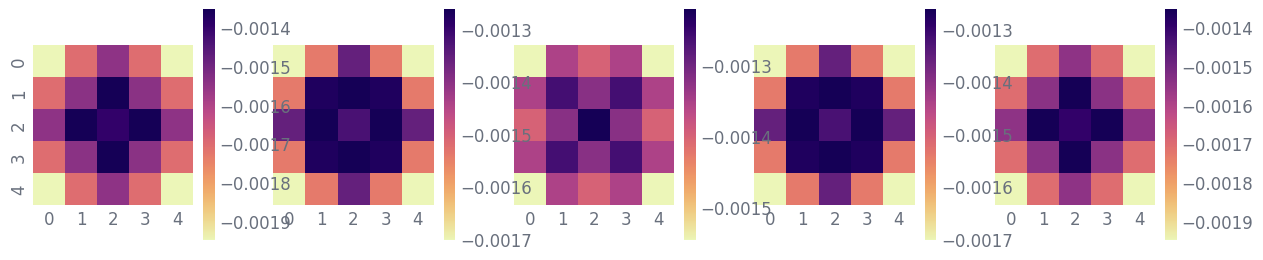

In [95]:
from eins import EinsOp


enc_kernel = EinsOp('subspace c_in c_out, subspace n1 n2 n3 -> n1 n2 n3 c_in c_out')(econv.kernel, econv.basis)
reduct = EinsOp('n n n c_in c_out -> n n n', reduce=('max'))(enc_kernel)

fig, axs = plt.subplots(1, 5, figsize=(15, 3), sharey=True)
for i, ax in enumerate(axs):
    sns.heatmap(reduct[i], cmap='rho_heatmap', robust=True, ax=ax, square=True)

<Axes: >

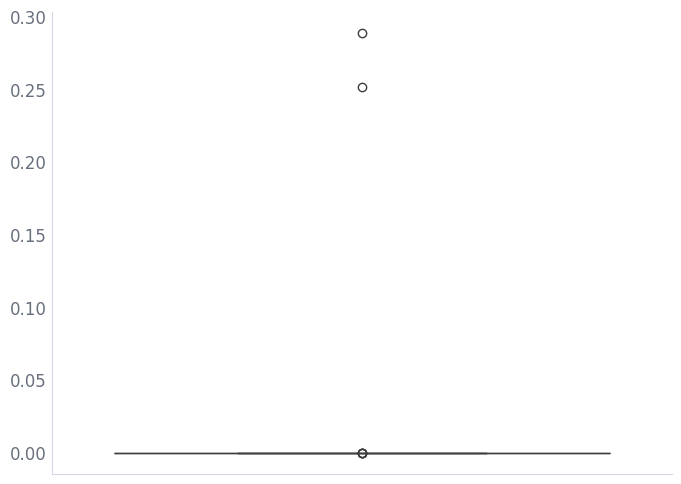

In [99]:
sns.boxplot(params['encoder_decoder']['encoder_conv']['layers_0']['layers_1']['scale'])

In [38]:
# debug_stat(params['mixer']['EquivariantMixerMLP_0']);
mha0 = params['diffusion']['backbone']['encoder']['encoderblock_0']['EquivariantMHA_0']
debug_structure(mha0);

arg0
├── key
│   ├── bias
│   │   └── float32[6, 64]
│   └── kernel
│       └── float32[384, 6, 64]
├── key_ln >>> scale
│   └── float32[64]
├── out
│   ├── bias
│   │   └── float32[384]
│   └── kernel
│       └── float32[6, 64, 384]
├── query
│   ├── bias
│   │   └── float32[6, 64]
│   └── kernel
│       └── float32[384, 6, 64]
├── query_ln >>> scale
│   └── float32[64]
├── relative_attn
│   └── bfloat16[35, 6]
└── value
    ├── bias
    │   └── float32[6, 64]
    └── kernel
        └── float32[384, 6, 64]

<Axes: >

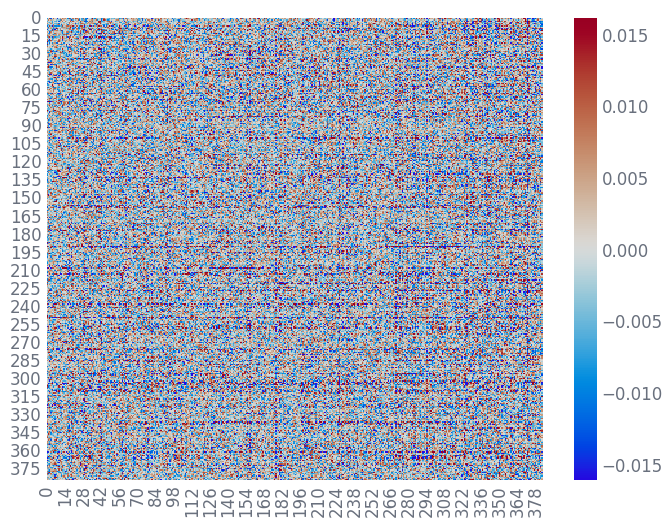

In [39]:
# sns.heatmap(params['head']['Dense_0']['kernel'], center=0, cmap='rho_diverging')
mat = mha0['query']['kernel'].astype(jnp.float32)
sns.heatmap(mat.reshape(mat.shape[0], mat.shape[0]), center=0, cmap='rho_diverging', robust=True)

<Axes: ylabel='Density'>

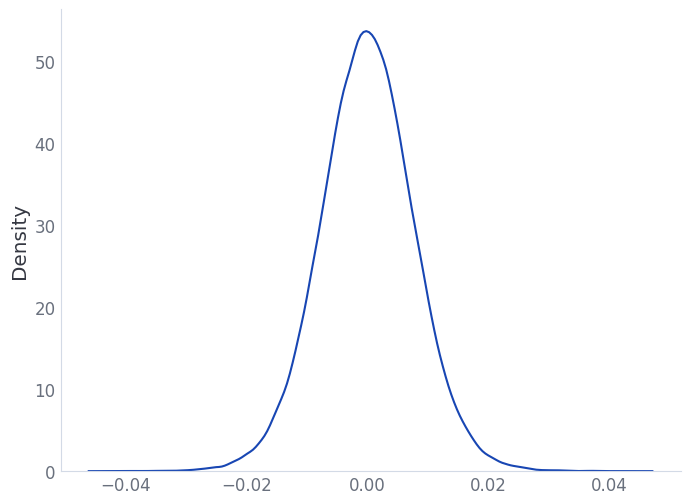

In [40]:
sns.kdeplot(mat.reshape(-1))

In [43]:
from umap import UMAP
import plotly.express as px

umap = UMAP(n_neighbors=15, metric='euclidean')
umap_df = spec_df.copy().T

umap_df[['x', 'y']] = umap.fit_transform(spec_df.T.values)

umap_df.columns = [str(c) for c in umap_df.columns]
px.scatter(umap_df.reset_index(), x='x', y='y', text='index', width=800, height=800, opacity=0)

In [44]:
debug_structure(params);

arg0
├── diffusion >>> backbone
│   ├── aby_scale
│   │   └── float32[6]
│   ├── condition_mlp
│   │   ├── Dense_0
│   │   │   ├── bias
│   │   │   │   └── float32[256]
│   │   │   └── kernel
│   │   │       └── float32[256, 256]
│   │   ├── Dense_1
│   │   │   ├── bias
│   │   │   │   └── float32[2304]
│   │   │   └── kernel
│   │   │       └── float32[256, 2304]
│   │   └── LayerNorm_0
│   │       ├── bias
│   │       │   └── float32[256]
│   │       └── scale
│   │           └── float32[256]
│   ├── encoder
│   │   ├── encoder_norm
│   │   │   ├── bias
│   │   │   │   └── float32[384]
│   │   │   └── scale
│   │   │       └── float32[384]
│   │   ├── encoderblock_0
│   │   │   ├── EquivariantMHA_0
│   │   │   │   ├── key
│   │   │   │   │   └── {...}
│   │   │   │   ├── key_ln
│   │   │   │   │   └── {...}
│   │   │   │   ├── out
│   │   │   │   │   └── {...}
│   │   │   │   ├── query
│   │   │   │   │   └── {...}
│   │   │   │   ├── query_ln
│   │   │   │   │   └── {...}
│   │   │   │   ├── relative_attn
│   │   │   │   │   └── bfloat16[35, 6]
│   │   │   │   └── value
│   │   │   │       └── {...}
│   │   │   ├── LayerNorm_0
│   │   │   │   ├── bias
│   │   │   │   │   └── float32[384]
│   │   │   │   └── scale
│   │   │   │       └── float32[384]
│   │   │   ├── LayerNorm_1
│   │   │   │   ├── bias
│   │   │   │   │   └── float32[384]
│   │   │   │   └── scale
│   │   │   │       └── float32[384]
│   │   │   └── LazyInMLP_0 >>> Dense_0
│   │   │       ├── bias
│   │   │       │   └── float32[384]
│   │   │       └── kernel
│   │   │           └── float32[384, 384]
│   │   ├── encoderblock_1
│   │   │   ├── EquivariantMHA_0
│   │   │   │   ├── key
│   │   │   │   │   └── {...}
│   │   │   │   ├── key_ln
│   │   │   │   │   └── {...}
│   │   │   │   ├── out
│   │   │   │   │   └── {...}
│   │   │   │   ├── query
│   │   │   │   │   └── {...}
│   │   │   │   ├── query_ln
│   │   │   │   │   └── {...}
│   │   │   │   ├── relative_attn
│   │   │   │   │   └── bfloat16[35, 6]
│   │   │   │   └── value
│   │   │   │       └── {...}
│   │   │   ├── LayerNorm_0
│   │   │   │   ├── bias
│   │   │   │   │   └── float32[384]
│   │   │   │   └── scale
│   │   │   │       └── float32[384]
│   │   │   ├── LayerNorm_1
│   │   │   │   ├── bias
│   │   │   │   │   └── float32[384]
│   │   │   │   └── scale
│   │   │   │       └── float32[384]
│   │   │   └── LazyInMLP_0 >>> Dense_0
│   │   │       ├── bias
│   │   │       │   └── float32[384]
│   │   │       └── kernel
│   │   │           └── float32[384, 384]
│   │   ├── encoderblock_2
│   │   │   ├── EquivariantMHA_0
│   │   │   │   ├── key
│   │   │   │   │   └── {...}
│   │   │   │   ├── key_ln
│   │   │   │   │   └── {...}
│   │   │   │   ├── out
│   │   │   │   │   └── {...}
│   │   │   │   ├── query
│   │   │   │   │   └── {...}
│   │   │   │   ├── query_ln
│   │   │   │   │   └── {...}
│   │   │   │   ├── relative_attn
│   │   │   │   │   └── bfloat16[35, 6]
│   │   │   │   └── value
│   │   │   │       └── {...}
│   │   │   ├── LayerNorm_0
│   │   │   │   ├── bias
│   │   │   │   │   └── float32[384]
│   │   │   │   └── scale
│   │   │   │       └── float32[384]
│   │   │   ├── LayerNorm_1
│   │   │   │   ├── bias
│   │   │   │   │   └── float32[384]
│   │   │   │   └── scale
│   │   │   │       └── float32[384]
│   │   │   └── LazyInMLP_0 >>> Dense_0
│   │   │       ├── bias
│   │   │       │   └── float32[384]
│   │   │       └── kernel
│   │   │           └── float32[384, 384]
│   │   └── encoderblock_3
│   │       ├── EquivariantMHA_0
│   │       │   ├── key
│   │       │   │   └── {...}
│   │       │   ├── key_ln
│   │       │   │   └── {...}
│   │       │   ├── out
│   │       │   │   └── {...}
│   │       │   ├── query
│   │       │   │   └── {...}
│   │       │   ├── query_ln
│   │       │   │   └── {...}
│   │       │   ├── relative_attn
│   │       │   │   └── bfloat16[35, 6]
│   │       │   └── value
│   │       │       └── {...}
│   │       ├── LayerNorm_0
│   │      

In [16]:
import functools as ft
from einops import rearrange, reduce

N_GRID = 24

grid_vals = jnp.linspace(0, 1, N_GRID + 1)[:-1]

xx, yy, zz = jnp.meshgrid(grid_vals, grid_vals, grid_vals)
xyz = rearrange(jnp.array([xx, yy, zz]), 'd n1 n2 n3 -> (n1 n2 n3) d')


cmap = rp.list_div_coolwarm

def plot(dens, n_skip=2, thresh=0.1, cmap='auto'):
    bg_mask = abs(dens) > thresh
    skip_mask = jnp.all(jnp.round(xyz * N_GRID) % n_skip == 0, axis=1)
    mask = skip_mask & bg_mask
    color_args = {
        'color_continuous_scale': cmap
    }
    if jnp.mean(dens < 0) > 0.1:
        color_args['color_continuous_midpoint'] = 0
        if color_args['color_continuous_scale'] == 'auto':
            color_args['color_continuous_scale'] = rp.list_div_icefire if is_dark else rp.list_div_coolwarm
    else:
        if color_args['color_continuous_scale'] == 'auto':
            color_args['color_continuous_scale'] = rp.list_inferna if is_dark else rp.list_inferna_r
    return px.scatter_3d(
        x=xyz[mask, 0],
        y=xyz[mask, 1],
        z=xyz[mask, 2],
        color=dens[mask],
        # color=np.array(species[mask]).astype('str'),
        range_x=[0, 1], range_y=[0, 1], range_z=[0, 1],
        opacity=1,
        **color_args
    )

In [45]:
from avid.dataset import load_file

batch = load_file(config, 0)

In [ ]:
spec, enc, patch = model.encoder_decoder.encode()